# Final Project Report

* Class: DS 5100
* Student Name: Tripat Panesar
* Student Net ID: tripatpanesar
* This URL: https://github.com/tripatpanesar/montecarlo 

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/tripatpanesar/montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
import pandas as pd
import numpy as np


class Die:
    '''
    This class represents a single die
    
    Attributes:
    Takes in a np.array and creates a die
    If not specified, the weights will default to 1
    Can change or update the weights
    Returns a df of faces as the index and column of weights
    After die is intialized and created, die can be rolled
    Die can be shown with the most recent roll
    '''
    
    def __init__(self, faces):
        '''
        Initializes the die and takes in faces as np array
        Checks that the faces inputted are np array
        Checks that faces are either integers or strings
        Die will be created with weight defaulting to 1
        Die returns as a pandas dataframe
        '''
        
        # array of sides must be np array
        if not isinstance(faces, np.ndarray):
            raise TypeError('Must be an Numpy Array')
            
        if not (np.issubdtype(faces.dtype, np.number) or 
                np.issubdtype(faces.dtype, np.str_)):
            raise TypeError("Array must be numbers or strings")
        
           
        # create self variables for faces and weights    
        self.faces = faces    
        self.weights = np.full(len(faces),1)
        
        # create the die df
        self.die = pd.DataFrame({'weights': self.weights}, index = self.faces)
                
        
    # change weight of a certain face
    def change_weight(self, face, updated_weight):
        '''
        Takes in updated weight and the face that needs the update
        Checks that the face inputted is present on the die
        Will update the weight and update the die
        '''
        
        # see if face is in faces
        if face not in self.faces:
            raise IndexError('Face Value not found')
            
        index = np.where(self.faces == face)#[0][0]
        index_num = int(index[0])
        self.weights[index_num] = updated_weight
        self.die = pd.DataFrame({'weights': self.weights}, index = self.faces)
        

        
    def roll(self, rolls = 1):
        '''
        The created die will run a 1 time (as default)
        Number of rolls can be specified at input
        Will return outcomes as a list
        '''
        
        roll = np.random.choice(self.faces, rolls, 
                                   p = self.die['weights'] / np.sum(self.die['weights']))
        final_outcome = roll.tolist()
        return final_outcome
    
    
    def show_die(self):
        ''' 
        Will return a copy and the state of the die 
        '''
        
        die_copy = self.die.copy()
        return die_copy



class Game:
    '''    
    This class represents a game
        
    Attributes:
    Takes in a die or multiple die objects as a list
    Can roll a number of times, defaults to 1 roll
    Will show results when called upon, defaults to wide format, can specify for narrow
    Returns game object as a pandas dataframe
    '''
        

    def __init__(self, dice):
        ''' 
        Initializes dice
        Creates empty pandas dataframe to store rolls and plays
        '''
        
        self.dice = dice
        self.play_df = pd.DataFrame()

    def roll(self, num_rolls = 1):
        ''' 
        Rolls the dice, defaults to 1 roll
        Stores the results in a private pandas dataframe
        '''
        
        results = {}
        for index, die in enumerate(self.dice):
            results[f"Die_{index}"] = die.roll(num_rolls)
        
        self.play_df = pd.DataFrame(results)
                
    def show_results(self, die_format = 'wide'):
        ''' 
        Takes in the previous data frame from roll function
        Returns the dataframe to the user
        Defaults to wide but can be specified for narrow
        '''
        
        if die_format == 'wide':
            wide_df = self.play_df.copy()
            return wide_df
        
        elif die_format == "narrow":
            return self.play_df.melt(ignore_index=False, var_name="Die", value_name="Outcome")



class Analyzer:
    '''
    This class represents an Analyzer class
    
    Attributes:
    Takes in a game object from the game class
    Checks to make sure object is of the game class
    When specified, will count the total number of jackpots for a game
    Calculates the total number of instances of each face for a game
    Calculates total combinations of a game
    Calculates total permutations of a game
    '''
    
    def __init__(self, game):
        ''' 
        Initializes game
        Checks to make sure inputted game is of game object
        '''
        
        if not isinstance(game, Game):
            raise ValueError("Input must be a game object")
        self.game = game
        
    def jackpot(self):
        '''
        Counts the number of jackpots present in the game
        A jackpot is when all faces in a given roll are the same
        Returns to the user the total number of jackpots
        '''
        
        jackpots = 0
        for _, row in self.game.play_df.iterrows():
            if row.nunique() == 1:
                jackpots += 1
        return jackpots
        
    def face_counts_per_roll(self):
        ''' 
        Calculuates the number of times a face is rolled in a game
        Runs through using a lambda function
        returns the number of counts per face as an integer
        '''
        
        face_counts = self.game.play_df.apply(lambda x: x.value_counts()).fillna(0)
        face_counts = face_counts.astype(int)
        return face_counts

    def combo_count(self):
        ''' 
        Calculates the total number of combinations in a game
        Runs through using a lambda function
        Returns the combos as a pandas dataframe with a column of counts
        '''
        
        combos = self.game.play_df.apply(lambda x: tuple(sorted(x))).value_counts().reset_index()
        return combos

    def perm_count(self):
        ''' 
        Calculates the total number of permutations in a game
        Runs through using a lambda function
        Returns the perms as a pandas dataframe with a column of counts
        '''
        
        perms = self.game.play_df.apply(lambda x: tuple(x.tolist())).value_counts().reset_index()
        return perms
        
```        

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
from montecarlo import Die, Game, Analyzer 

class TestMethods(unittest.TestCase):
    
        
    def test_init_die(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        self.assertTrue(type(die), Die)        
        

    def test_change_weight(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        die.change_weight(1, 2)
        self.assertEqual(die.die.loc[1]['weights'], 2)

    def test_roll_single(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        rolls = die.roll(100)
        self.assertEqual(len(rolls), 100)
        self.assertTrue(all(roll in faces for roll in rolls))
        
    def test_init_game(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game(die)
        self.assertTrue(type(game), Game)      

    def test_game_creation(self):
        faces1 = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces1)
        faces2 = np.array(['A', 'B', 'C'])
        die2 = Die(faces2)
        game = Game([die1, die2])
        self.assertEqual(len(game.dice), 2)

    def test_roll_double(self):
        faces1 = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces1)
        faces2 = np.array(['A', 'B', 'C'])
        die2 = Die(faces2)
        game = Game([die1, die2])
        game.roll(10)
        self.assertEqual(game.play_df.shape, (10, 2))

    def test_show_results_wide(self):
        faces1 = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces1)
        faces2 = np.array(['A', 'B', 'C'])
        die2 = Die(faces2)
        game = Game([die1, die2])
        game.roll(5)
        results = game.show_results(die_format='wide')
        self.assertEqual(results.shape, (5, 2))
        
    def test_init_analyzer(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(faces)
        game = Game(die)
        analyzer = Analyzer(game)
        self.assertTrue(type(analyzer), Analyzer)           

    def test_analyzer(self):
        faces1 = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces1)
        faces2 = np.array(['A', 'B', 'C'])
        die2 = Die(faces2)
        game = Game([die1, die2])
        analyzer = Analyzer(game)
        self.assertEqual(analyzer.game, game)

    def test_jackpot(self):
        faces = np.array([1, 1, 1, 1, 1])
        die = Die(faces)
        game = Game([die])
        game.roll(10)
        analyzer = Analyzer(game)
        self.assertEqual(analyzer.jackpot(), 10)
        
    def test_combo(self):
        faces = np.array([1,1])
        die = Die(faces)
        game = Game([die])
        game.roll(1000)
        analyzer = Analyzer(game)
        self.assertEqual(len(analyzer.combo_count()), 1)
        
    def test_perms(self):
        faces = np.array([1,2])
        die = Die(faces)
        game = Game([die])
        game.roll(1000)
        analyzer = Analyzer(game)
        self.assertEqual(len(analyzer.perm_count()), 2)        
        
        


if __name__ == '__main__':
    unittest.main(verbosity = 3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```  
test_analyzer (__main__.TestMethods) ... ok  
test_change_weight (__main__.TestMethods) ... ok  
test_combo (__main__.TestMethods) ... ok  
test_game_creation (__main__.TestMethods) ... ok  
test_init_analyzer (__main__.TestMethods) ... ok  
test_init_die (__main__.TestMethods) ... ok  
test_init_game (__main__.TestMethods) ... ok  
test_jackpot (__main__.TestMethods) ... ok  
test_perms (__main__.TestMethods) ... ok  
test_roll_double (__main__.TestMethods) ... ok  
test_roll_single (__main__.TestMethods) ... ok  
test_show_results_wide (__main__.TestMethods) ... ok  

----------------------------------------------------------------------  
Ran 12 tests in 0.015s  

OK 
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
import os
os.chdir('/Users/tripatpanesar/Desktop/DS 5100/my_proj/montecarlo')

In [5]:
import montecarlo 

In [6]:
from montecarlo import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [8]:
help(montecarlo)

Help on module montecarlo:

NAME
    montecarlo

DESCRIPTION
    ## Tripat Panesar
    ###  Project Classes for the dies, games, and analysis

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  This class represents an Analyzer class
     |  
     |  Attributes:
     |  Takes in a game object from the game class
     |  Checks to make sure object is of the game class
     |  When specified, will count the total number of jackpots for a game
     |  Calculates the total number of instances of each face for a game
     |  Calculates total combinations of a game
     |  Calculates total permutations of a game
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initializes game
     |      Checks to make sure inputted game is of game object
     |  
     |  combo_count(self)
     |      Calculates the total number of combinations in a game
     |      Run

In [9]:
help(Die)

Help on class Die in module montecarlo:

class Die(builtins.object)
 |  Die(faces)
 |  
 |  This class represents a single die
 |  
 |  Attributes:
 |  Takes in a np.array and creates a die
 |  If not specified, the weights will default to 1
 |  Can change or update the weights
 |  Returns a df of faces as the index and column of weights
 |  After die is intialized and created, die can be rolled
 |  Die can be shown with the most recent roll
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Initializes the die and takes in faces as np array
 |      Checks that the faces inputted are np array
 |      Checks that faces are either integers or strings
 |      Die will be created with weight defaulting to 1
 |      Die returns as a pandas dataframe
 |  
 |  change_weight(self, face, updated_weight)
 |      Takes in updated weight and the face that needs the update
 |      Checks that the face inputted is present on the die
 |      Will update the weight and update the di

In [10]:
help(Game)

Help on class Game in module montecarlo:

class Game(builtins.object)
 |  Game(dice)
 |  
 |  This class represents a game
 |      
 |  Attributes:
 |  Takes in a die or multiple die objects as a list
 |  Can roll a number of times, defaults to 1 roll
 |  Will show results when called upon, defaults to wide format, can specify for narrow
 |  Returns game object as a pandas dataframe
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dice)
 |      Initializes dice
 |      Creates empty pandas dataframe to store rolls and plays
 |  
 |  roll(self, num_rolls=1)
 |      Rolls the dice, defaults to 1 roll
 |      Stores the results in a private pandas dataframe
 |  
 |  show_results(self, die_format='wide')
 |      Takes in the previous data frame from roll function
 |      Returns the dataframe to the user
 |      Defaults to wide but can be specified for narrow
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  _

In [11]:
help(Analyzer)

Help on class Analyzer in module montecarlo:

class Analyzer(builtins.object)
 |  Analyzer(game)
 |  
 |  This class represents an Analyzer class
 |  
 |  Attributes:
 |  Takes in a game object from the game class
 |  Checks to make sure object is of the game class
 |  When specified, will count the total number of jackpots for a game
 |  Calculates the total number of instances of each face for a game
 |  Calculates total combinations of a game
 |  Calculates total permutations of a game
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game)
 |      Initializes game
 |      Checks to make sure inputted game is of game object
 |  
 |  combo_count(self)
 |      Calculates the total number of combinations in a game
 |      Runs through using a lambda function
 |      Returns the combos as a pandas dataframe with a column of counts
 |  
 |  face_counts_per_roll(self)
 |      Calculuates the number of times a face is rolled in a game
 |      Runs through using a lambda function
 |   

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/tripatpanesar/montecarlo/blob/main/montecarlo/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

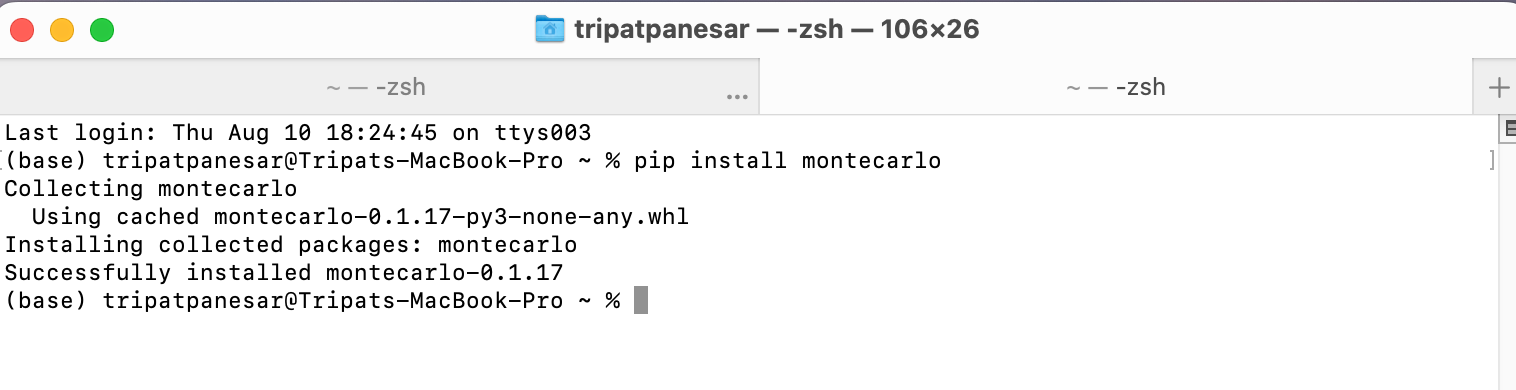

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

In [14]:
import numpy as np
import pandas as pd
from montecarlo import Die, Game, Analyzer 
import matplotlib.pyplot as plt 

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [15]:
fair_coin = Die(np.array(['H', 'T']))
fair_coin.show_die()

,weights
H,1
T,1


In [21]:
unfair_coin = Die(np.array(['H','T']))
unfair_coin.change_weight('H', 5)
unfair_coin.show_die()

,weights
H,5
T,1


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [ ]:
fair_game = Game([fair_coin, fair_coin])
fair_game.roll(1000)
fair = Analyzer(fair_game)
fair.face_counts_per_roll()

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [22]:
unfair_game = Game([fair_coin, unfair_coin, unfair_coin])
unfair_game.roll(1000)
unfair = Analyzer(unfair_game)
unfair.face_counts_per_roll()

,Die_0,Die_1,Die_2
H,539,835,823
T,461,165,177


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [23]:
fair_jackpot = fair.jackpot()
fair_jackpot

493

In [24]:
unfair_jackpot = unfair.jackpot()
unfair_jackpot

379

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [26]:
fair_prop = fair_jackpot/1000
unfair_prop = unfair_jackpot/1000
print(fair_prop, unfair_prop)

0.493 0.379


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

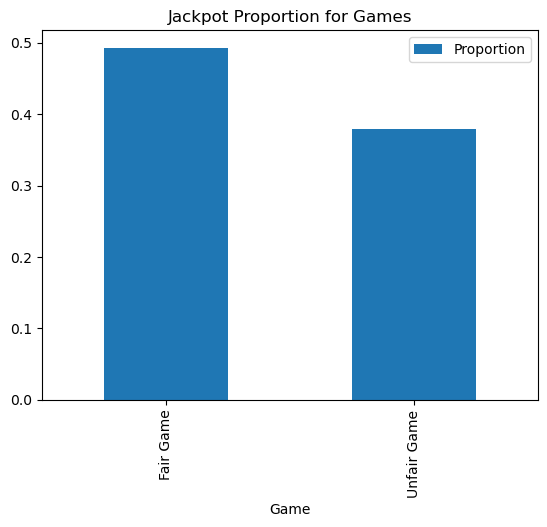

In [28]:
df = pd.DataFrame({'Game':['Fair Game', 'Unfair Game'], 
                   'Proportion':[fair_prop, unfair_prop]})
plot = df.plot.bar(x = 'Game', 
                 y = 'Proportion', 
                 title = 'Jackpot Proportion for Games')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [29]:
die1 = Die(np.array([1,2,3,4,5,6]))
die2 = Die(np.array([1,2,3,4,5,6]))
die3 = Die(np.array([1,2,3,4,5,6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [30]:
die1.change_weight(6, 5)
die1.show_die()

,weights
1,1
2,1
3,1
4,1
5,1
6,5


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [31]:
die2.change_weight(1, 5)
die2.show_die()

,weights
1,5
2,1
3,1
4,1
5,1
6,1


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [32]:
game1 = Game([die3, die3, die3, die3, die3])
game1.roll(10000)
analysis1 = Analyzer(game1)
analysis1.face_counts_per_roll()

,Die_0,Die_1,Die_2,Die_3,Die_4
1,1676,1592,1774,1686,1730
2,1678,1657,1601,1646,1651
3,1707,1717,1693,1628,1650
4,1638,1639,1662,1657,1657
5,1650,1726,1615,1696,1616
6,1651,1669,1655,1687,1696


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [33]:
game2 = Game([die1, die2, die3, die3, die3])
game2.roll(10000)
analysis2 = Analyzer(game2)
analysis2.face_counts_per_roll()

,Die_0,Die_1,Die_2,Die_3,Die_4
1,967,5064,1746,1660,1653
2,1003,986,1631,1669,1670
3,1016,1017,1685,1659,1629
4,1047,938,1622,1647,1698
5,996,987,1627,1740,1700
6,4971,1008,1689,1625,1650


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [34]:
j1 = analysis1.jackpot()
j2 = analysis2.jackpot()
print(j1, j2)

4 9


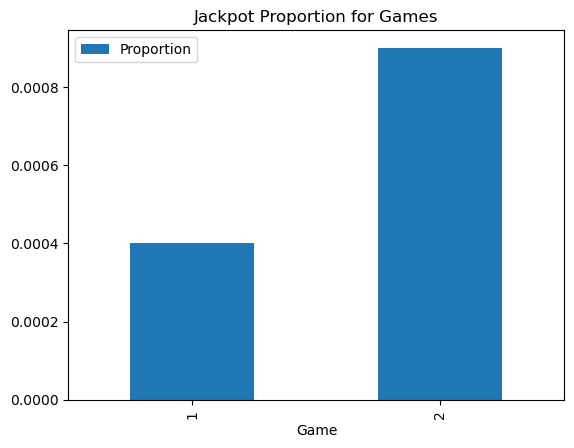

In [35]:
df = pd.DataFrame({'Game':['1', '2'], 
                   'Proportion':[j1/10000, j2/10000]})
plot = df.plot.bar(x = 'Game', 
                 y = 'Proportion', 
                 title = 'Jackpot Proportion for Games')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [36]:
import os
os.chdir('/Users/tripatpanesar/Desktop/DS 5100/PROJECT')

In [37]:
weights = pd.read_csv('english_letters.txt', sep = " ", header = None)
print(len(weights), weights.head(3))

26    0          1
0  E  529117365
1  T  390965105
2  A  374061888


In [38]:
scrabble = pd.read_csv('scrabble_words.txt', header = None)
scrabble = scrabble.rename(columns = {0: 'words'})
print(len(scrabble), scrabble.head(3))

279496    words
0     AA
1    AAH
2  AAHED


In [39]:
alphas = weights[0].tolist()
weights = weights[1].tolist()

die = Die(np.array(alphas))

for f, face in enumerate(alphas):
    die.change_weight(face, weights[f])
    
die.show_die()

,weights
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975
L,183996130


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [40]:
game = Game([die, die, die, die])
game.roll(1000)
analysis = Analyzer(game)
x = analysis.face_counts_per_roll()
x

,Die_0,Die_1,Die_2,Die_3
A,82,88,75,81
B,24,16,19,16
C,29,32,39,34
D,39,33,35,42
E,123,118,123,124
F,18,21,15,19
G,21,17,20,25
H,50,34,46,52
I,76,69,66,74
J,3,3,4,2


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [43]:
perm = analysis.perm_count()
perm['word'] = perm['Die_0'] + perm['Die_1'] + perm['Die_2'] + perm['Die_3']
perm.head(3)

,Die_0,Die_1,Die_2,Die_3,0,word
0,T,E,E,H,2,TEEH
1,R,M,O,P,2,RMOP
2,E,T,H,E,2,ETHE


In [44]:
words = perm['word'].isin(scrabble.words)
word_count = words.sum()
word_count

56

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [47]:
game = Game([die, die, die, die, die])
game.roll(1000)
analysis = Analyzer(game)
x = analysis.face_counts_per_roll()
x

,Die_0,Die_1,Die_2,Die_3,Die_4
A,75,97,79,96,87
B,23,12,9,13,9
C,27,46,38,23,29
D,40,40,47,39,41
E,115,114,119,124,118
F,20,24,27,25,21
G,28,24,21,19,25
H,65,51,63,55,57
I,76,61,65,69,56
J,1,4,2,5,1


In [49]:
perm = analysis.perm_count()
perm['word'] = perm['Die_0'] + perm['Die_1'] + perm['Die_2'] + perm['Die_3'] + perm['Die_4']
perm.head(3)

,Die_0,Die_1,Die_2,Die_3,Die_4,0,word
0,A,A,E,P,T,1,AAEPT
1,O,P,S,O,E,1,OPSOE
2,O,N,B,A,T,1,ONBAT


In [50]:
words = perm['word'].isin(scrabble.words)
word_count = words.sum()
word_count

5

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.